In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pwd


/content


In [3]:
!ls /content/drive/MyDrive/data


housing  lifesat.csv	   lifesat_gdp2.gsheet	lifesat_test.csv
lifesat  lifesat_full.csv  lifesat_gdp.csv


In [4]:
!ls /content/drive/MyDrive/data/lifesat

gdp_per_capita.csv  oecd_bli.csv


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pathlib import Path

In [6]:
np.random.seed(42)

In [7]:
oecd = pd.read_csv('/content/drive/MyDrive/data/lifesat/oecd_bli.csv')
gdp_per_capita = pd.read_csv('/content/drive/MyDrive/data/lifesat/gdp_per_capita.csv')

In [8]:
display(gdp_per_capita)

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
0,Afghanistan,AFG,2002,1189.784668
1,Afghanistan,AFG,2003,1235.810063
2,Afghanistan,AFG,2004,1200.278013
3,Afghanistan,AFG,2005,1286.793659
4,Afghanistan,AFG,2006,1315.789117
...,...,...,...,...
7104,Zimbabwe,ZWE,2016,3173.610829
7105,Zimbabwe,ZWE,2017,3274.611198
7106,Zimbabwe,ZWE,2018,3341.665418
7107,Zimbabwe,ZWE,2019,3027.656038


In [9]:
gdp_per_capita_2020 = gdp_per_capita[gdp_per_capita["Year"]==2020]
#gdp_per_capita_2020 = gdp_per_capita_2020.rename(columns={})
#jakiś rename idk what
display(gdp_per_capita_2020)

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
18,Afghanistan,AFG,2020,1978.961579
49,Africa Eastern and Southern,NaN,2020,3387.594670
80,Africa Western and Central,NaN,2020,4003.158913
111,Albania,ALB,2020,13295.410885
142,Algeria,DZA,2020,10681.679297
...,...,...,...,...
6984,Vanuatu,VUT,2020,2762.791388
7015,Vietnam,VNM,2020,8200.331867
7046,World,OWID_WRL,2020,16194.040310
7077,Zambia,ZMB,2020,3270.035112


In [10]:
oecd["Indicator"].value_counts()

,count
Indicator,
Student skills,200
Self-reported health,182
Quality of support network,168
Life satisfaction,168
Labour market insecurity,162
Homicide rate,123
Feeling safe walking alone at night,123
Life expectancy,123
Water quality,123


In [11]:
oecd =oecd[oecd["INEQUALITY"]=="TOT"]
oecd = oecd.pivot(index="Country",columns="Indicator",values="Value")
oecd

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,24.0,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,23.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5


In [12]:
oecd = oecd.reset_index()
oecd

Indicator,Country,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
0,Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
1,Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
2,Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
3,Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
4,Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3
5,Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,...,25879.0,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5
6,Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,...,NaN,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1
7,Czech Republic,20.0,0.7,94.0,5.65,74.0,72.3,0.5,21453.0,NaN,...,25372.0,91.0,1.4,60.0,1.6,491.0,NaN,61.0,87.0,17.9
8,Denmark,9.0,0.5,81.0,2.34,74.0,83.5,0.6,29606.0,118637.0,...,51466.0,95.0,1.9,71.0,2.0,504.0,15.87,86.0,95.0,19.5
9,Estonia,8.0,7.0,89.0,2.42,74.0,69.0,3.1,19697.0,159373.0,...,24336.0,92.0,1.6,53.0,2.7,524.0,14.90,64.0,84.0,17.7


In [13]:
gdp_per_capita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               7109 non-null   object 
 1   Code                                                 5729 non-null   object 
 2   Year                                                 7109 non-null   int64  
 3   GDP per capita, PPP (constant 2017 international $)  7109 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 222.3+ KB


In [14]:
full_country_stats = oecd.merge(gdp_per_capita_2020, left_on="Country", right_on="Entity", how="inner")

In [15]:
full_country_stats = full_country_stats[["Country", "Life satisfaction", "GDP per capita, PPP (constant 2017 international $)"]]
full_country_stats = full_country_stats.sort_values(by="GDP per capita, PPP (constant 2017 international $)")
full_country_stats
full_country_stats.to_csv("/content/drive/MyDrive/data/lifesat_full.csv", index=False)

In [16]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats['GDP per capita, PPP (constant 2017 international $)']>=min_gdp) & (full_country_stats['GDP per capita, PPP (constant 2017 international $)']<= max_gdp)]
country_stats.to_csv("/content/drive/MyDrive/data/lifesat_gdp.csv", index=False)

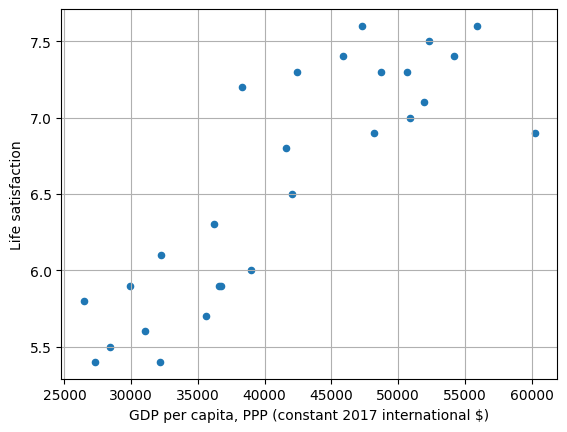

In [17]:
lifesat = pd.read_csv('/content/drive/MyDrive/data/lifesat_gdp.csv')
lifesat.plot(kind='scatter', grid=True, x='GDP per capita, PPP (constant 2017 international $)', y='Life satisfaction')
plt.show()

In [18]:
x = lifesat[['GDP per capita, PPP (constant 2017 international $)']].to_numpy()
y = lifesat[['Life satisfaction']].to_numpy()

model = LinearRegression()

model.fit(x, y)

theta_0=model.intercept_[0]
theta_1=model.coef_[0][0]
print(f"theta-0: {theta_0}")
print(f"theta-1: {theta_1}")

theta-0: 3.7490494273769093
theta-1: 6.778899694341222e-05


In [19]:
cyprus_gdp_2020 = (
    gdp_per_capita_2020[gdp_per_capita_2020["Entity"]=="Cyprus"][["GDP per capita, PPP (constant 2017 international $)"]]
)
cyprus_gdp_2020

,"GDP per capita, PPP (constant 2017 international $)"
1517,37655.180346


In [20]:
cyprus_LS = model.predict(cyprus_gdp_2020)
cyprus_LS

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[6.30165633]])

In [22]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(x,y)
model_knn.predict(cyprus_gdp_2020)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


array([[6.33333333]])